<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session10/ERA1_S10_CIFAR10_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Models & Modules

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session10/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
!pip install torch-lr-finder -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


# Loading train and test data with transforms and loader functions

In [57]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


# Exploratory Data Analysis

## Summary Statistics

In [58]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


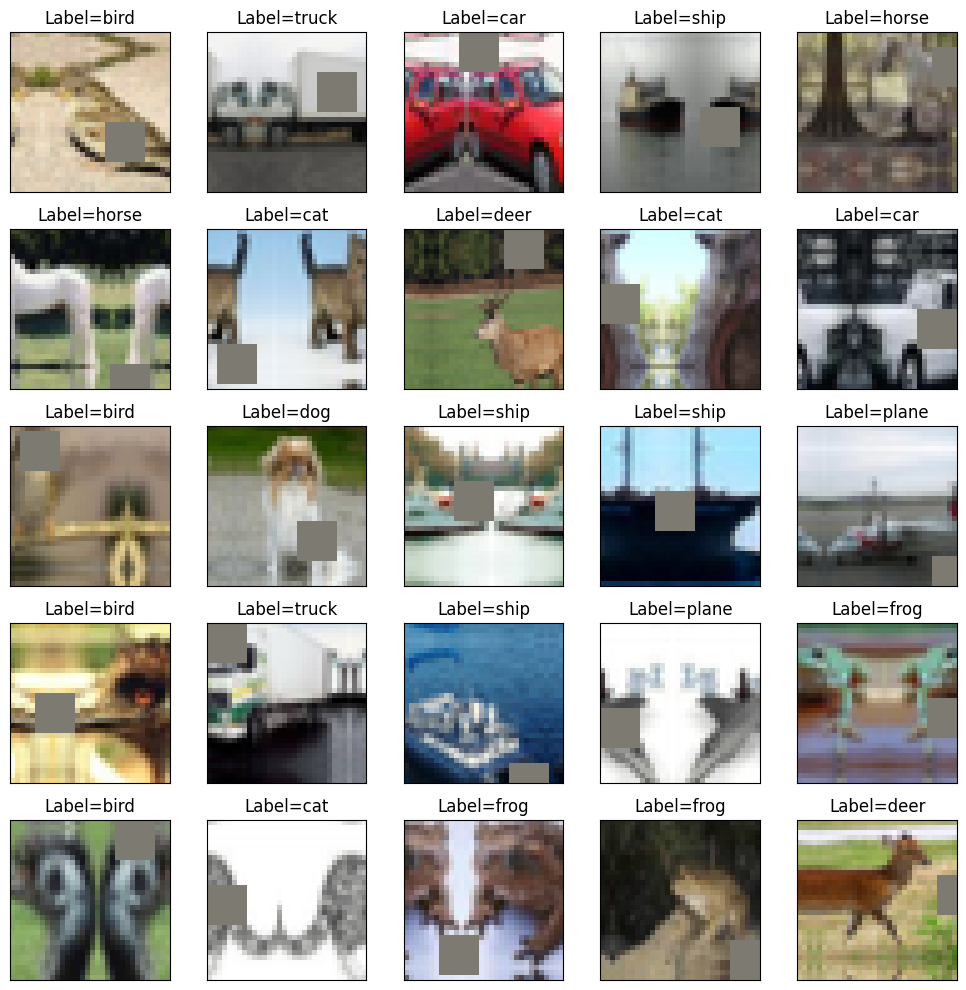

In [59]:
cifar10.sample_pictures(train_flag=True)

## Model

In [60]:
from custom_resnet import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [61]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## LR Finder

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.26E-03


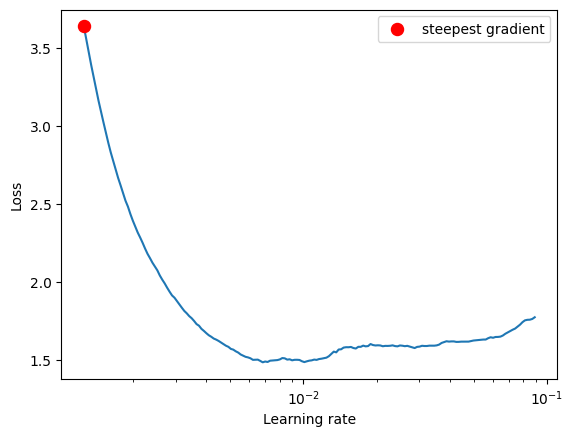

<Axes: xlabel='Learning rate', ylabel='Loss'>

In [62]:
import copy
from torch_lr_finder import LRFinder
import torch.nn as nn
import numpy as np

net_exp = copy.deepcopy(net)
optimizer = torch.optim.Adam(net_exp.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net_exp, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=200)
lr_finder.plot()

## Define a Loss function and optimizer

In [63]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr=0.003,
                                                steps_per_epoch=len(trainloader),
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False,
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,

## Training & Testing

Epoch: 0,Loss=1.27 Batch_id=97 Accuracy=45.96: 100%|██████████| 98/98 [00:42<00:00,  2.28it/s]


Test set: Average loss: 0.0025, Accuracy: 5561/10000 (55.61%)



Epoch: 1,Loss=1.16 Batch_id=97 Accuracy=61.01: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]


Test set: Average loss: 0.0020, Accuracy: 6552/10000 (65.52%)



Epoch: 2,Loss=0.90 Batch_id=97 Accuracy=68.28: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]


Test set: Average loss: 0.0021, Accuracy: 6560/10000 (65.60%)



Epoch: 3,Loss=0.87 Batch_id=97 Accuracy=71.74: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]


Test set: Average loss: 0.0016, Accuracy: 7346/10000 (73.46%)



Epoch: 4,Loss=0.83 Batch_id=97 Accuracy=75.16: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]


Test set: Average loss: 0.0017, Accuracy: 7162/10000 (71.62%)



Epoch: 5,Loss=0.63 Batch_id=97 Accuracy=77.59: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]


Test set: Average loss: 0.0012, Accuracy: 7886/10000 (78.86%)



Epoch: 6,Loss=0.60 Batch_id=97 Accuracy=80.28: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]


Test set: Average loss: 0.0010, Accuracy: 8354/10000 (83.54%)



Epoch: 7,Loss=0.60 Batch_id=97 Accuracy=81.69: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Test set: Average loss: 0.0010, Accuracy: 8159/10000 (81.59%)



Epoch: 8,Loss=0.54 Batch_id=97 Accuracy=83.28: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]


Test set: Average loss: 0.0009, Accuracy: 8471/10000 (84.71%)



Epoch: 9,Loss=0.56 Batch_id=97 Accuracy=84.54: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]


Test set: Average loss: 0.0010, Accuracy: 8327/10000 (83.27%)



Epoch: 10,Loss=0.39 Batch_id=97 Accuracy=85.81: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0009, Accuracy: 8463/10000 (84.63%)



Epoch: 11,Loss=0.42 Batch_id=97 Accuracy=86.96: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]


Test set: Average loss: 0.0007, Accuracy: 8801/10000 (88.01%)



Epoch: 12,Loss=0.40 Batch_id=97 Accuracy=87.76: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Test set: Average loss: 0.0008, Accuracy: 8745/10000 (87.45%)



Epoch: 13,Loss=0.37 Batch_id=97 Accuracy=88.90: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Test set: Average loss: 0.0007, Accuracy: 8769/10000 (87.69%)



Epoch: 14,Loss=0.27 Batch_id=97 Accuracy=89.19: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Test set: Average loss: 0.0007, Accuracy: 8850/10000 (88.50%)



Epoch: 15,Loss=0.29 Batch_id=97 Accuracy=90.11: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Test set: Average loss: 0.0007, Accuracy: 8893/10000 (88.93%)



Epoch: 16,Loss=0.28 Batch_id=97 Accuracy=90.76: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]


Test set: Average loss: 0.0006, Accuracy: 8922/10000 (89.22%)



Epoch: 17,Loss=0.25 Batch_id=97 Accuracy=91.58: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Test set: Average loss: 0.0006, Accuracy: 8951/10000 (89.51%)



Epoch: 18,Loss=0.19 Batch_id=97 Accuracy=92.43: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Test set: Average loss: 0.0006, Accuracy: 8966/10000 (89.66%)



Epoch: 19,Loss=0.19 Batch_id=97 Accuracy=93.14: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Test set: Average loss: 0.0006, Accuracy: 9035/10000 (90.35%)



Epoch: 20,Loss=0.14 Batch_id=97 Accuracy=93.73: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]


Test set: Average loss: 0.0005, Accuracy: 9105/10000 (91.05%)



Epoch: 21,Loss=0.16 Batch_id=97 Accuracy=94.07: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Test set: Average loss: 0.0005, Accuracy: 9112/10000 (91.12%)



Epoch: 22,Loss=0.19 Batch_id=97 Accuracy=94.68: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]


Test set: Average loss: 0.0005, Accuracy: 9127/10000 (91.27%)



Epoch: 23,Loss=0.14 Batch_id=97 Accuracy=94.90: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]


Test set: Average loss: 0.0005, Accuracy: 9134/10000 (91.34%)

Finished Training


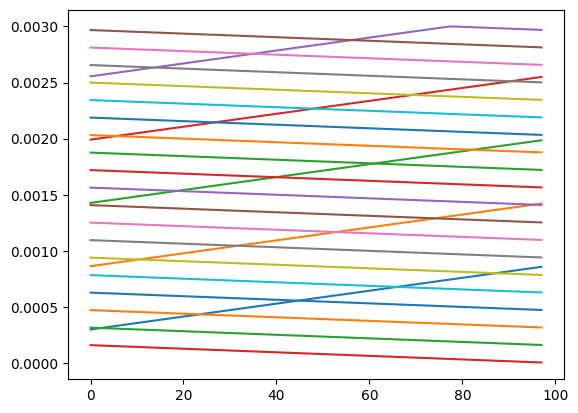

In [64]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

## Display an image from the test set

Files already downloaded and verified


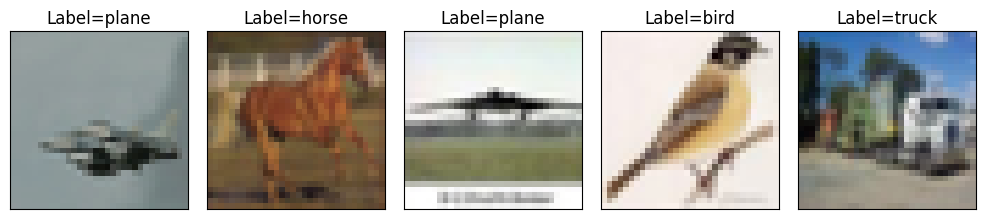

In [65]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [66]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:  plane horse plane  bird truck


## Evaluating Training Accuracy

In [67]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 94.212 %%


## Evaluating Test Accuracy

In [68]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 91.34 %%


## Evaluating test Accuracy over different classes

In [69]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 85 %
Accuracy of  deer : 100 %
Accuracy of   dog : 88 %
Accuracy of  frog : 88 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 91 %


## Misclassified Images

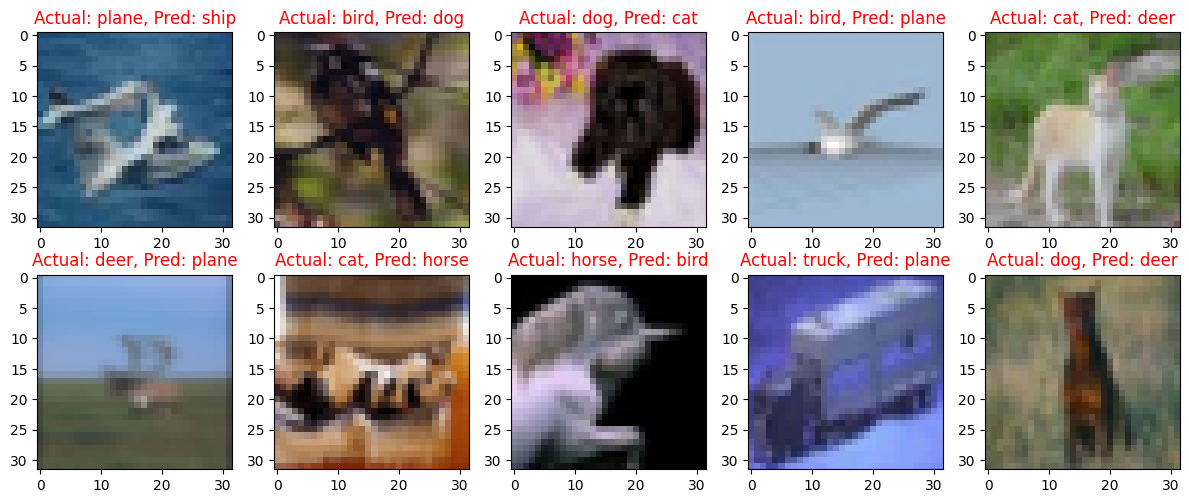

In [70]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)